In [8]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display
import json


In [32]:
#import user.json as a dict
with open('user.json', "r") as f:
        user=json.load(f)

data = user["0"]["data"]
result = user["0"]["result"]

print(len(result))
print(len(data))


378
378


In [33]:
# creating dataframes
dataframe = pd.DataFrame(data, columns=["Name", "Type 1", "Type 2", "color","Generation", "legendary"])
resultframe = pd.DataFrame(result, columns=["favorite"])


In [34]:
# generating numerical labels
le1 = LabelEncoder()
dataframe["Name"] = le1.fit_transform(dataframe["Name"])

le2 = LabelEncoder()
dataframe["Type 1"] = le2.fit_transform(dataframe["Type 1"])

le3 = LabelEncoder()
dataframe["Type 2"] = le3.fit_transform(dataframe["Type 2"])

le4 = LabelEncoder()
dataframe["color"] = le4.fit_transform(dataframe["color"])

le5 = LabelEncoder()
dataframe["Generation"] = le5.fit_transform(dataframe["Generation"])

le6 = LabelEncoder()
dataframe["legendary"] = le6.fit_transform(dataframe["legendary"])

le7 = LabelEncoder()
resultframe["favorite"] = le7.fit_transform(resultframe["favorite"])

In [35]:
# Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe.values, resultframe)

dot_data = tree.export_graphviz(
    dtc,
    out_file=None,
    feature_names=dataframe.columns,
    filled=True,
    rounded=True,
    class_names=le7.inverse_transform(resultframe.favorite.unique()),
)
graph = graphviz.Source(dot_data)

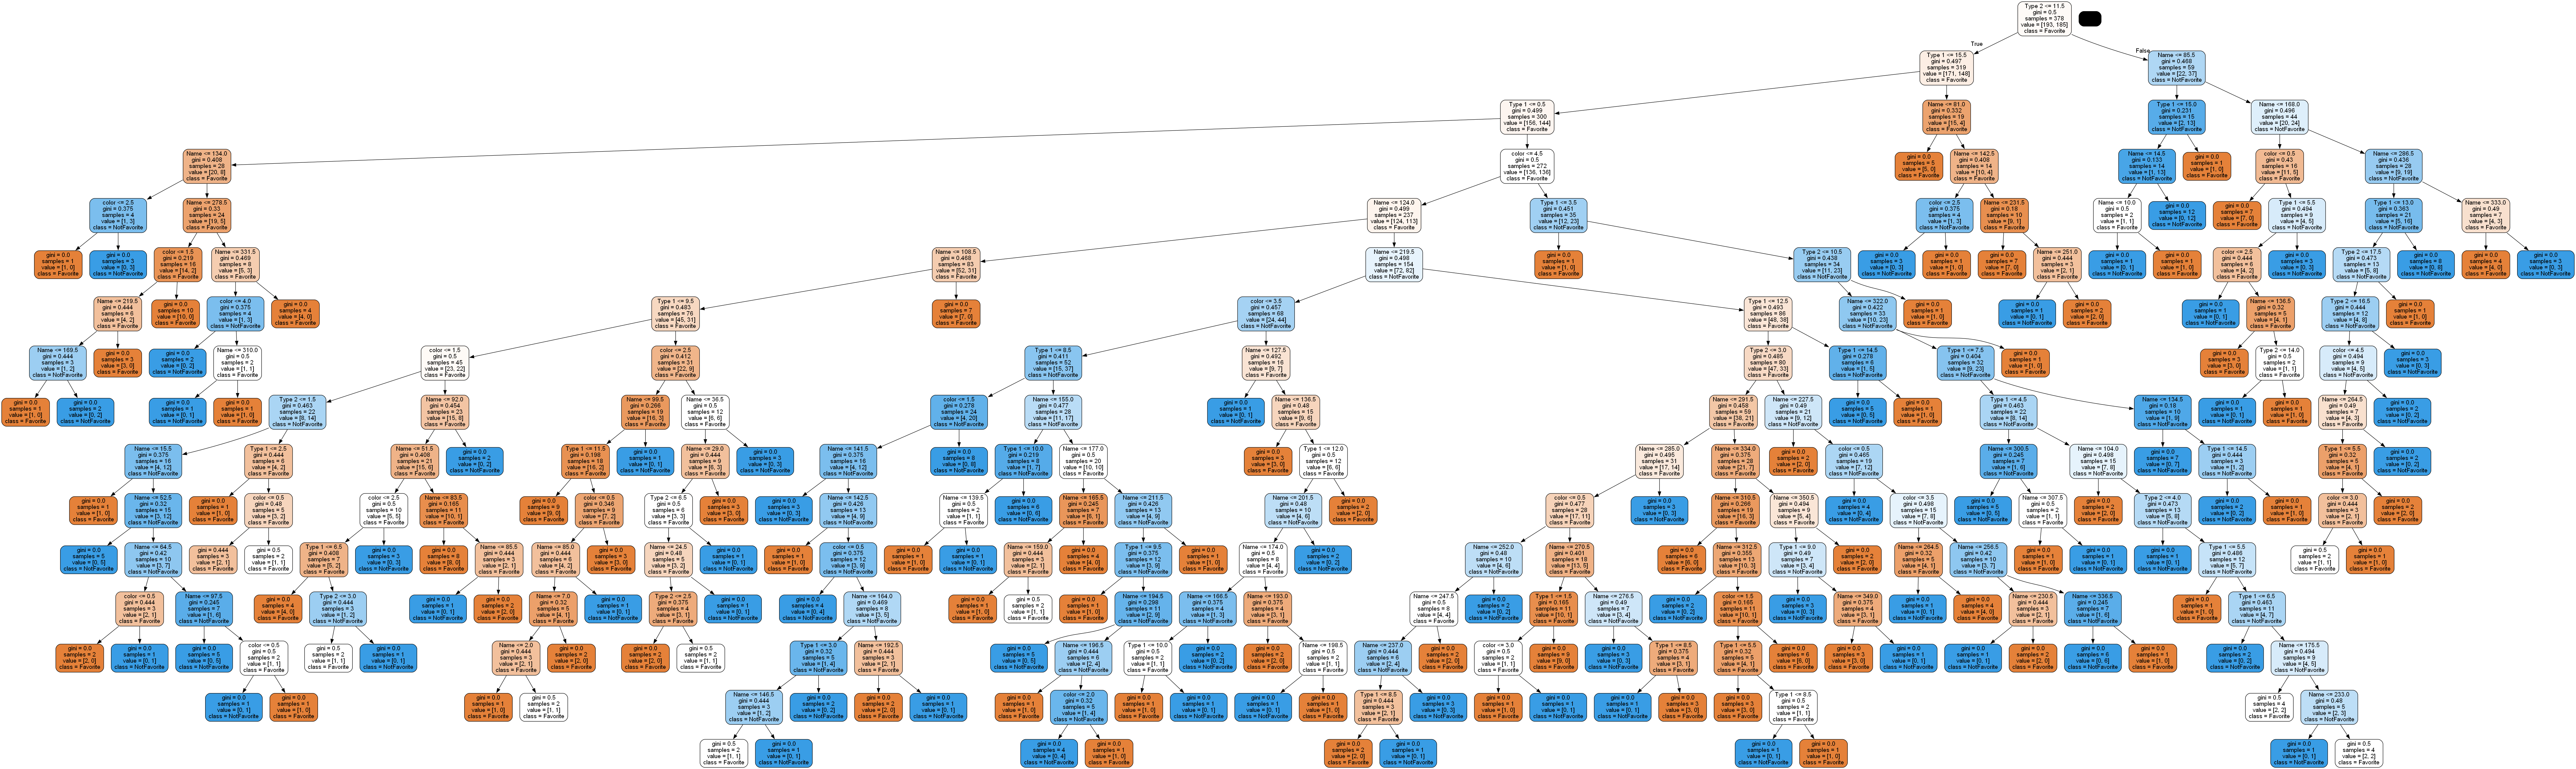

In [36]:
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)